In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/MyDrive/GSOC_code/updated_data/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterGrid


from sklearn.utils import shuffle

import pandas as pd
import numpy as np

import pickle

import random
from sklearn.metrics.pairwise import euclidean_distances

import numpy as np
from sklearn.decomposition import PCA

# Table of contents
1. [Load custom functions](#customfunctions)
2. [Load data](#loaddata)
    <!-- 1. [Sub paragraph](#subparagraph1) -->
3. [Summary stats of spectra](#spectrastats)
4. [Physical data & spectra](#physdata)
5. [Spectra with different volumes/stds](#volspectra)

# Load custom functions <a name="customfunctions"></a>



In [ ]:
from analysis_functions import runs_of_ones_list
from data_load_new import load_split_pool

# Load data <a name="loaddata"></a>


In [ ]:
directory_list = ['/content/gdrive/MyDrive/GSOC_code/updated_data/data_updated']
data_dict = load_split_pool(1929, "max", pooling_width = None, scale = False,
                    directory_list = directory_list)

Directory: /content/gdrive/MyDrive/GSOC_code/data_updated Physical properties shape: (2880, 17) Spectral prop shape: (2880, 119921)
Spectral data shape (2880, 119921)
Physical data shape (2880, 17)


# Summary stats of spectra <a name="spectrastats"></a>


Text(0, 0.5, 'Average intensity')

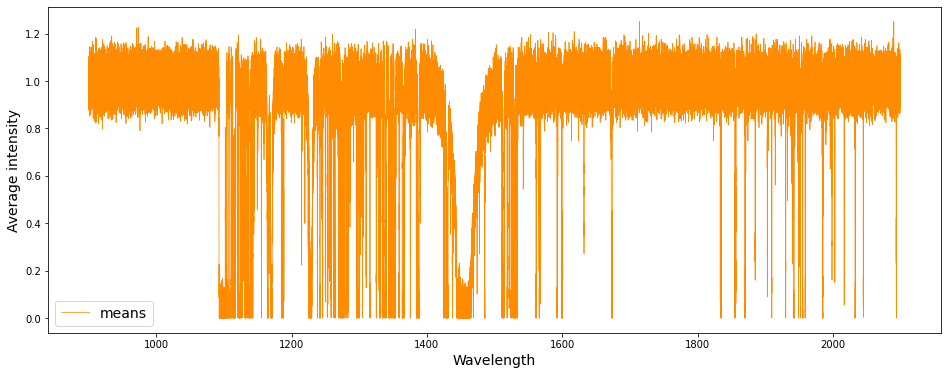

In [ ]:
# Example of random spectrum

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (16, 6))
ax.plot(data_dict["wavelengths"], data_dict['x']['train'][1490, :] , label = "means", linewidth = 0.75, 
        color = "darkorange")
ax.legend(fontsize = 14)
ax.set_xlabel("Wavelength", fontsize = 14)
ax.set_ylabel("Average intensity", fontsize = 14)

In [ ]:
# Calculate summary stats for each wavelength
wavelength_std = pd.DataFrame(data_dict['x']['train']).std(axis = 0)
wavelength_mean = pd.DataFrame(data_dict['x']['train']).mean(axis = 0)

# Summary stats for each spectrum
spectral_std = pd.DataFrame(data_dict['x']['train']).std(axis = 1)

Text(0, 0.5, 'Average intensity')

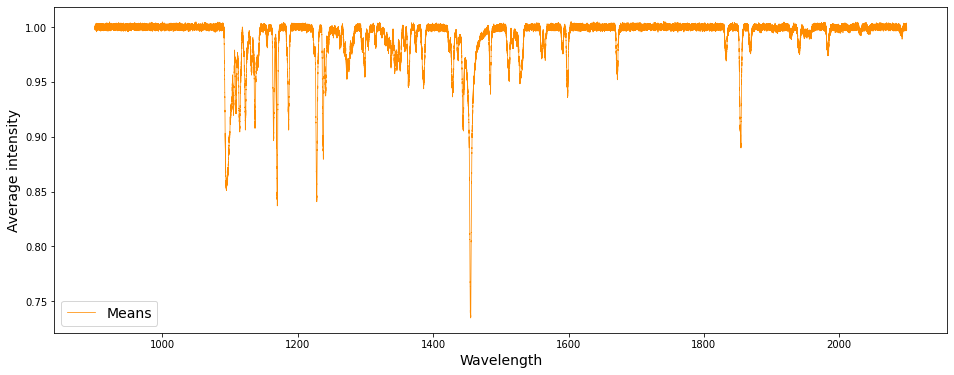

In [ ]:
fig, ax = plt.subplots(1, 1, sharex = True, figsize = (16, 6))
ax.plot(data_dict["wavelengths"], wavelength_mean , label = "Means", linewidth = 0.75, 
        color = "darkorange")
ax.legend(fontsize = 14)
ax.set_xlabel("Wavelength", fontsize = 14)
ax.set_ylabel("Average intensity", fontsize = 14)

Text(0.5, 0, 'Wavelength')

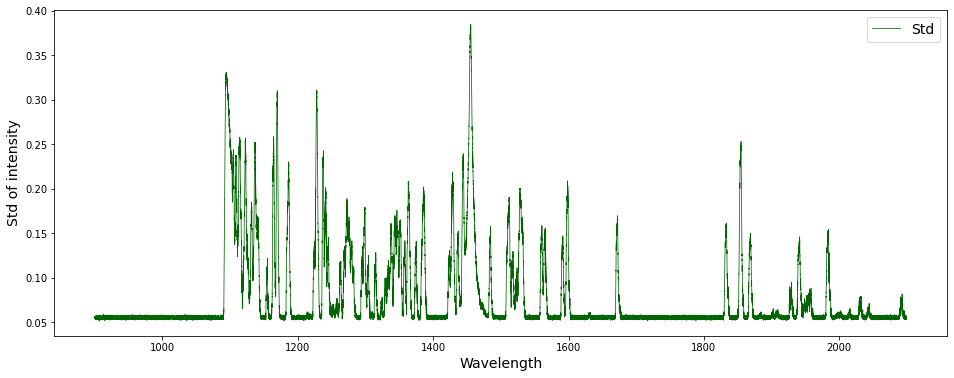

In [ ]:
fig, ax = plt.subplots(1, 1, sharex = True, figsize = (16, 6))
ax.plot(data_dict["wavelengths"], wavelength_std , label = "Std", linewidth = 0.75, 
        color = "darkgreen")
# ax.plot(data_dict["wavelengths"][:-1], data_description.loc["25%", :] , label = "means", linewidth = 0.75, 
#         color = "grey")
ax.legend(fontsize = 14)
ax.set_ylabel("Std of intensity", fontsize = 14)
ax.set_xlabel("Wavelength", fontsize = 14)
# ax.set_ylim([0,1.2])

In [ ]:
# Max width of signal in spectrum

spectral_lines_below_1 = (data_dict['x']['train'] < 1)
signal_runs = pd.DataFrame(spectral_lines_below_1).apply(runs_of_ones_list, axis = 1)
max_signal_width = np.array( [np.array(x).max() for x in signal_runs] )
# Find spectrum with max signal width and plot it
max_signal_width_spectrum = np.where(max_signal_width == max_signal_width.max() )

Text(0, 0.5, 'Average intensity')

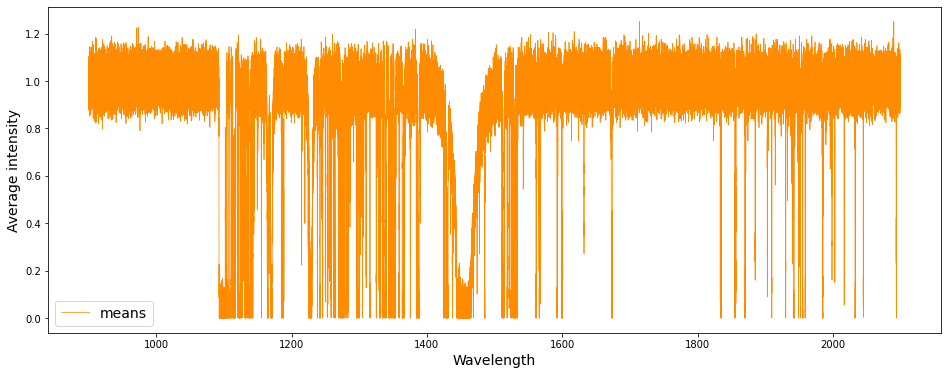

In [ ]:
fig, ax = plt.subplots(1, 1, sharex = True, figsize = (16, 6))
ax.plot(data_dict["wavelengths"], data_dict['x']['train'][max_signal_width_spectrum[0][0], :] , label = "means", linewidth = 0.75, 
        color = "darkorange")
ax.legend(fontsize = 14)
ax.set_xlabel("Wavelength", fontsize = 14)
ax.set_ylabel("Average intensity", fontsize = 14)

# Physical data & spectra <a name="physdata"></a>


In [ ]:
y_train_df = pd.DataFrame(data_dict["y"]["train"], columns = data_dict['physical_col_names'])
y_train_df["angle_diff1"] = y_train_df['halo_unit_vector1'] - y_train_df['ray_unit_vector1']
y_train_df["angle_diff2"] = y_train_df['halo_unit_vector2'] - y_train_df['ray_unit_vector2']
y_train_df.drop(['bad_trajectories', 'zero_length', 'ray_number', 'halo_unit_vector1',
       'halo_unit_vector2', 'halo_unit_vector3', 'ray_unit_vector1',
       'ray_unit_vector2', 'ray_unit_vector3'], axis = 1, inplace = True)
# y_train_df["angle_diff1"] = y_train_df['halo_unit_vector1'] - y_train_df['ray_unit_vector1']
# y_train_df["angle_diff2"] = y_train_df['halo_unit_vector2'] - y_train_df['ray_unit_vector2']

In [ ]:
y_val_df = pd.DataFrame(data_dict["y"]["val"], columns = data_dict['physical_col_names'])
y_val_df["angle_diff1"] = y_val_df['halo_unit_vector1'] - y_val_df['ray_unit_vector1']
y_val_df["angle_diff2"] = y_val_df['halo_unit_vector2'] - y_val_df['ray_unit_vector2']
y_val_df.drop(['bad_trajectories', 'zero_length', 'ray_number', 'halo_unit_vector1',
       'halo_unit_vector2', 'halo_unit_vector3', 'ray_unit_vector1',
       'ray_unit_vector2', 'ray_unit_vector3'], axis = 1, inplace = True)

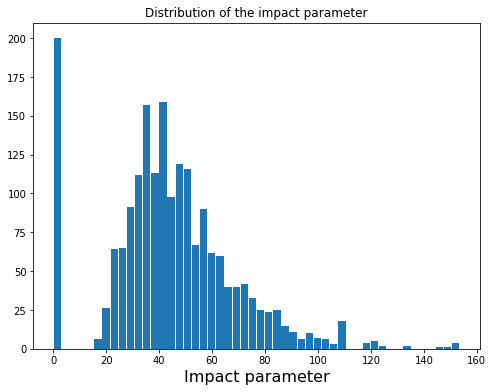

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
# sns.set(font_scale=1.1) 
# import matplotlib
# matplotlib.rc_file_defaults()
ax.hist(y_train_df["impact_param"], bins = 50, rwidth = 0.9);
ax.set_xlabel("Count", fontsize = 16)
ax.set_xlabel("Impact parameter", fontsize = 16)
ax.set_title("Distribution of the impact parameter");


Text(0.5, 1.0, "Reconstruction error for spectra with 'wide' signal")

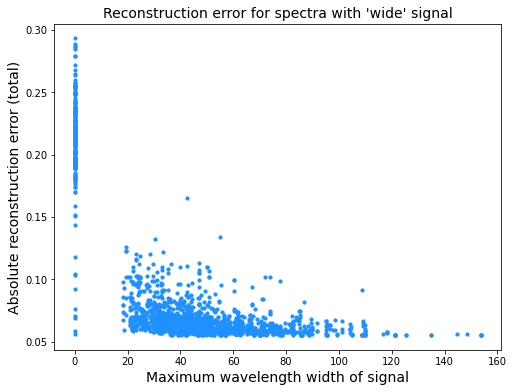

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x = y_train_df[['impact_param']], y = spectral_std, s = 10, color = "dodgerblue")
# ae_abs_errors_mean_truesignals
ax.set_xlabel("Maximum wavelength width of signal", fontsize = 14)
ax.set_ylabel("Absolute reconstruction error (total)", fontsize = 14)
ax.set_title("Reconstruction error for spectra with 'wide' signal", fontsize = 14)

Text(0, 0.5, 'Spectral standard deviation')

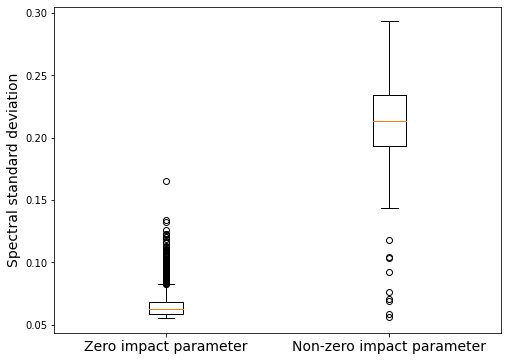

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.boxplot(spectral_std[y_train_df["impact_param"] == 0], positions = [2])
ax.boxplot(spectral_std[y_train_df["impact_param"] != 0])
ax.set_xticklabels(["Non-zero impact parameter", "Zero impact parameter"], fontsize = 14)
ax.set_ylabel("Spectral standard deviation", fontsize = 14)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Std of spectrum')

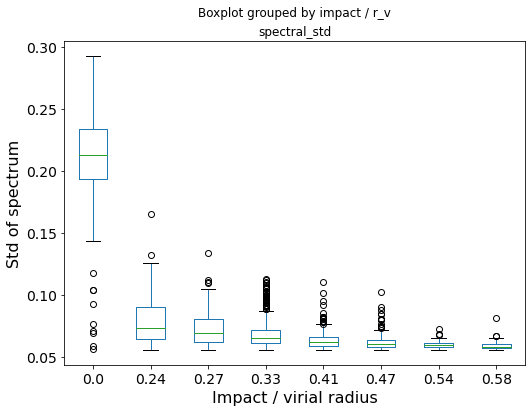

In [ ]:
plot_multiple_boxplots_df = pd.DataFrame()
plot_multiple_boxplots_df["impact / r_v"] = np.round( y_train_df["impact_param"] / y_train_df["r_v"], 2). astype(str) # np.round(merged_encoded_phys_ae['impact_r_v'],4).astype(str)
plot_multiple_boxplots_df["spectral_std"] = spectral_std # merged_encoded_phys_ae_nonzero_impact.loc[:,[0, 1,2,3 ,4]]


f = plot_multiple_boxplots_df.boxplot(column = "spectral_std",by='impact / r_v', grid = False, figsize = (8, 6), fontsize = 14);
f.set_xlabel("Impact / virial radius", fontsize = 16)
f.set_ylabel("Std of spectrum", fontsize = 16)

Text(0, 0.5, 'Max signal width')

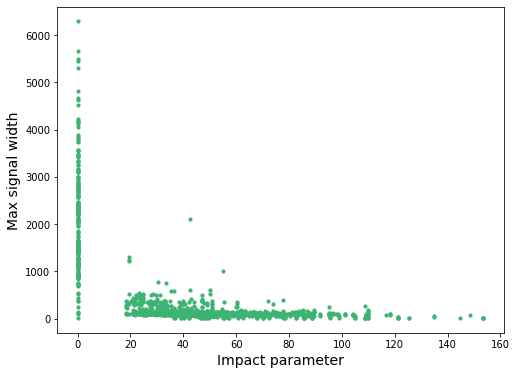

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x = y_train_df[['impact_param']], y = max_signal_width, s = 10, color = "mediumseagreen")
# ae_abs_errors_mean_truesignals
ax.set_xlabel("Impact parameter", fontsize = 14)
ax.set_ylabel("Max signal width", fontsize = 14)
# ax.set_title("", fontsize = 14)

Text(0, 0.5, 'Max signal width')

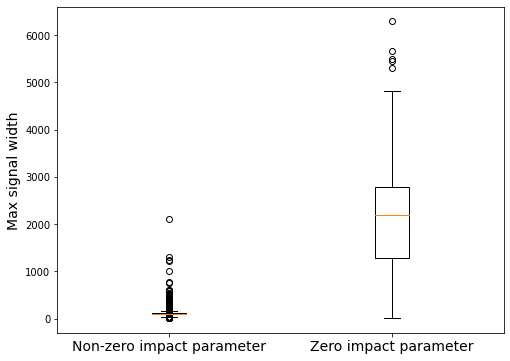

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.boxplot(max_signal_width[y_train_df["impact_param"] == 0], positions = [2])
ax.boxplot(max_signal_width[y_train_df["impact_param"] != 0])
ax.set_xticklabels(["Zero impact parameter", "Non-zero impact parameter", ], fontsize = 14)
ax.set_ylabel("Max signal width", fontsize = 14)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Max signal width')

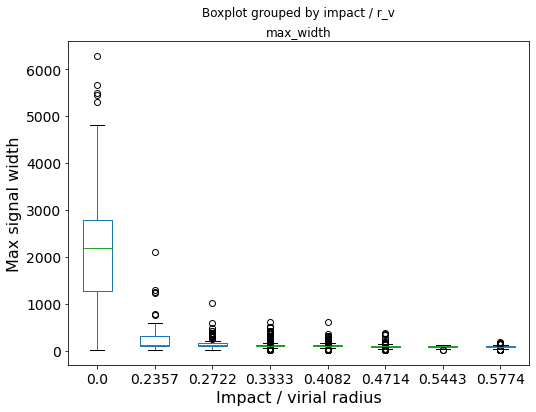

In [ ]:
plot_multiple_boxplots_df = pd.DataFrame()
plot_multiple_boxplots_df["impact / r_v"] = np.round( y_train_df["impact_param"] / y_train_df["r_v"], 4). astype(str) # np.round(merged_encoded_phys_ae['impact_r_v'],4).astype(str)
plot_multiple_boxplots_df["max_width"] = max_signal_width # merged_encoded_phys_ae_nonzero_impact.loc[:,[0, 1,2,3 ,4]]


f = plot_multiple_boxplots_df.boxplot(column = "max_width",by='impact / r_v', grid = False, figsize = (8, 6), fontsize = 14)
f.set_xlabel("Impact / virial radius", fontsize = 16)
f.set_ylabel("Max signal width", fontsize = 16)

# Spectra with different volumes/stds <a name="volspectra"></a>

In [ ]:
total_flux_val = np.abs(data_dict["x"]["val"]-1).sum(axis = 1) # total volume of spectral lines
np.where( (total_flux_val > 15950) & (total_flux_val < 16050) )

(array([290]),)

Text(0.5, 1.0, 'Distribution of spectra by total volume')

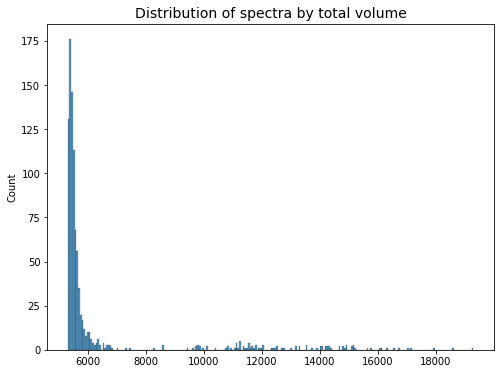

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
# ax.hist(total_flux_val, bins = 50)
# ax.set_yscale("log")
ax= sns.histplot(total_flux_val)
ax.set_title("Distribution of spectra by total volume", fontsize = 14)

(0.0, 1.25)

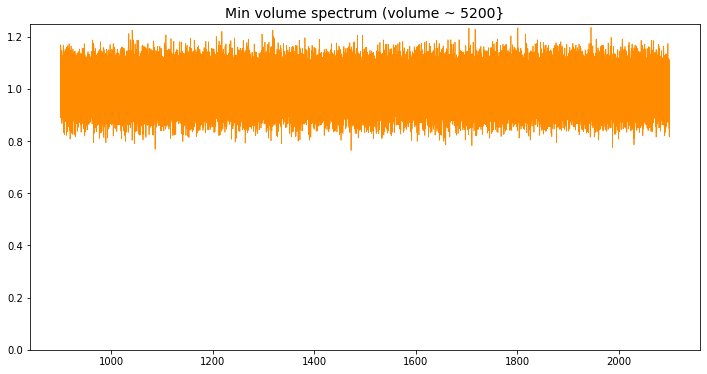

In [ ]:
spectrum_number = 86

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12,6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Min volume spectrum (volume ~ 5200}", fontsize = 14)
ax.set_ylim([0,1.25])

(0.0, 1.25)

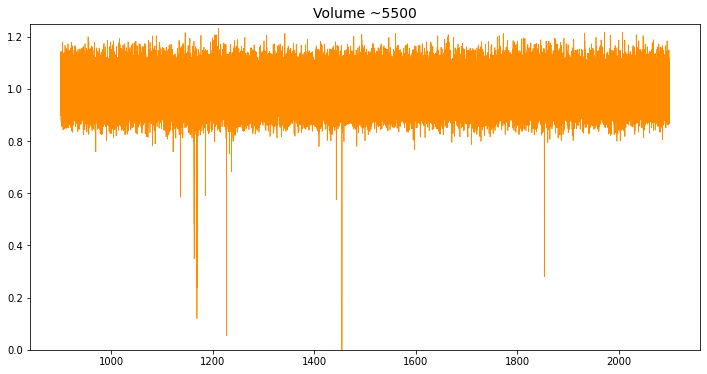

In [ ]:
spectrum_number = 1

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12,6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Volume ~5500", fontsize = 14)
ax.set_ylim([0,1.25])

(0.0, 1.25)

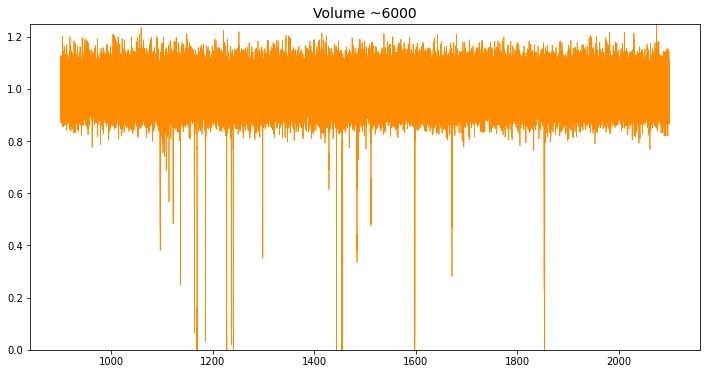

In [ ]:
spectrum_number = 224

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12,6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Volume ~6000", fontsize = 14)
ax.set_ylim([0,1.25])

(0.0, 1.25)

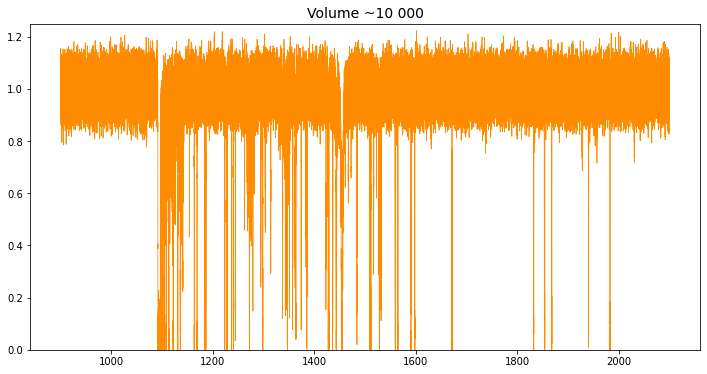

In [ ]:
spectrum_number = 913

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12, 6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Volume ~10 000", fontsize = 14)
ax.set_ylim([0,1.25])

(0.0, 1.25)

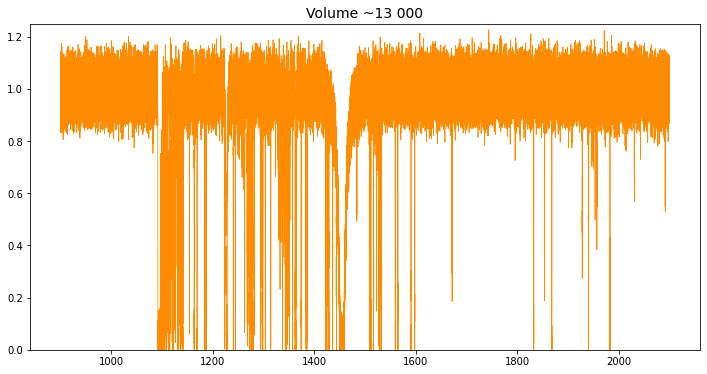

In [ ]:
spectrum_number = 833

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12, 6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Volume ~13 000", fontsize = 14)
ax.set_ylim([0,1.25])

(0.0, 1.25)

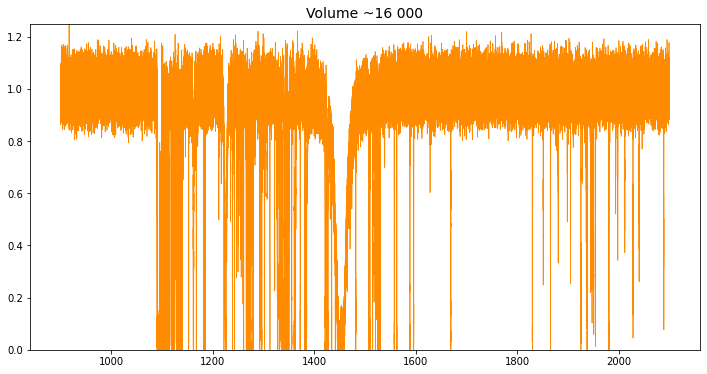

In [ ]:
spectrum_number = 290

fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12, 6))
ax.plot(data_dict["wavelengths"], data_dict["x"]["val"][spectrum_number,:], linewidth = 0.75, 
          color = "darkorange")
ax.set_title("Volume ~16 000", fontsize = 14)
ax.set_ylim([0,1.25])